In [19]:
from ema_workbench import Model, MultiprocessingEvaluator, Policy, Scenario

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation
from ema_workbench.analysis import pairs_plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ema_workbench.analysis import prim

from ema_workbench.analysis import feature_scoring

In [5]:
if __name__ == "__main__":
    model, _ = get_model_for_problem_formulation(4)

    with MultiprocessingEvaluator(model, n_processes=-1) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=3)
    #
    # # Now you can visualize or analyze results
    # print(experiments.head())

100%|████████████████████████████████████████| 300/300 [00:15<00:00, 19.47it/s]


In [6]:
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,28,349.220579,10.0,0.947874,276.115341,1.0,0.832308,264.585330,1.0,0.864124,...,5,2,1,1,3,4,1,106,103,dikesnet
1,95,298.603362,1.5,0.430898,44.621978,1.0,0.011621,62.108927,10.0,0.714978,...,5,2,1,1,3,4,1,107,103,dikesnet
2,86,264.582410,1.5,0.128229,98.065702,1.0,0.633284,200.531630,1.5,0.533635,...,5,2,1,1,3,4,1,108,103,dikesnet
3,76,67.813483,1.5,0.028722,316.413719,1.0,0.172531,339.314075,1.0,0.016337,...,5,2,1,1,3,4,1,109,103,dikesnet
4,47,317.825072,1.0,0.030449,95.536407,1.5,0.723672,112.941906,1.0,0.638299,...,5,2,1,1,3,4,1,110,103,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,95,109.269081,10.0,0.677096,80.105692,10.0,0.493341,165.431741,1.5,0.415904,...,3,10,8,6,6,10,2,201,105,dikesnet
296,4,138.446951,10.0,0.240413,149.683980,1.0,0.286943,71.037159,10.0,0.942178,...,3,10,8,6,6,10,2,202,105,dikesnet
297,30,207.496299,10.0,0.760202,348.957340,10.0,0.362828,48.061251,1.5,0.897621,...,3,10,8,6,6,10,2,203,105,dikesnet
298,11,110.744862,10.0,0.314275,264.832399,10.0,0.323817,208.793537,1.0,0.199074,...,3,10,8,6,6,10,2,204,105,dikesnet


In [12]:
#Establish policies
#Dit moeten we dan aanpassen naar onze locaties

def get_do_nothing_dict():
    return {l.name: 0 for l in model.levers}


policies = [
    Policy(
        "policy 1- upper bound",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2- lower bound",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3- random locations ",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [13]:
n_scenarios = 100
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

100%|████████████████████████████████████████| 300/300 [00:12<00:00, 23.16it/s]


In [14]:
experiments, outcomes = results


In [15]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,24,183.435784,1.0,0.216189,343.845618,1.0,0.658147,218.565162,10.0,0.465185,...,0,0,0,0,0,0,0,306,policy 1- upper bound,dikesnet
1,46,191.231247,1.0,0.295344,101.005295,1.5,0.887138,142.402053,1.5,0.420238,...,0,0,0,0,0,0,0,307,policy 1- upper bound,dikesnet
2,20,126.511505,10.0,0.751803,341.010181,10.0,0.150791,202.602033,1.5,0.036881,...,0,0,0,0,0,0,0,308,policy 1- upper bound,dikesnet
3,32,107.838197,1.5,0.057135,75.195199,1.5,0.801010,253.945493,1.5,0.126788,...,0,0,0,0,0,0,0,309,policy 1- upper bound,dikesnet
4,2,138.893018,10.0,0.311473,283.711550,1.0,0.453958,84.688773,10.0,0.845624,...,0,0,0,0,0,0,0,310,policy 1- upper bound,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,78,345.065014,10.0,0.496513,215.752422,1.0,0.330174,84.184802,10.0,0.361954,...,0,0,0,0,0,0,0,401,policy 3- random locations,dikesnet
296,111,236.537406,10.0,0.680377,80.989909,1.5,0.401994,207.025432,1.0,0.619970,...,0,0,0,0,0,0,0,402,policy 3- random locations,dikesnet
297,129,218.132408,10.0,0.140003,139.561033,1.0,0.083724,148.598496,10.0,0.944563,...,0,0,0,0,0,0,0,403,policy 3- random locations,dikesnet
298,93,176.392513,1.0,0.434596,161.474584,1.0,0.526367,289.856160,1.0,0.027000,...,0,0,0,0,0,0,0,404,policy 3- random locations,dikesnet


In [17]:
print(outcomes.keys())


dict_keys(['Expected Annual Damage', 'Dike Investment Costs', 'Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


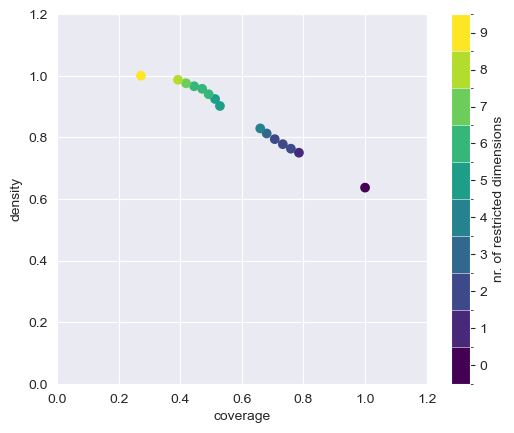

coverage     0.272251
density      1.000000
id          14.000000
k           52.000000
mass         0.173333
mean         1.000000
n           52.000000
res_dim      9.000000
Name: 14, dtype: float64

                                  box 14                                     
                                     min              max  qp value  qp value
1_RfR 0                              0.0              0.0       NaN  0.000169
A.1_pfail                       0.003461         0.793886       NaN  0.005028
A.3_pfail                       0.002575         0.816956       NaN  0.012622
A.2_pfail                       0.001846          0.94063       NaN  0.378329
A.5_Bmax                       30.794145       322.998903       NaN  0.378329
A.0_ID flood wave shape              0.0            116.0       NaN  0.391816
A.5_pfail                       0.005438         0.960009       NaN  0.391816
discount rate 1          {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.004175       NaN
discount rate 0   

/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5, 3.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

In [33]:
#PRIM SCENARIO 1: hoge schade in tijdstap 0
y_high_damage = outcomes["Expected Annual Damage"][:, 0] > 1e8

# Run PRIM
prim_alg_high = prim.Prim(experiments, y_high_damage, threshold=0.75)
box_high = prim_alg_high.find_box()

#Plot
box_high.show_tradeoff()
plt.show()

box_high.inspect()

/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


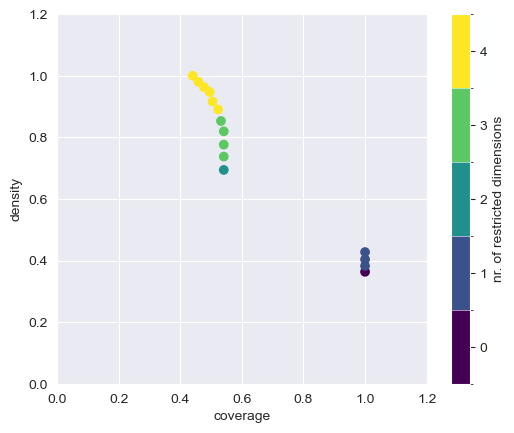

coverage     0.440367
density      1.000000
id          14.000000
k           48.000000
mass         0.160000
mean         1.000000
n           48.000000
res_dim      4.000000
Name: 14, dtype: float64

             box 14                                 
                min       max      qp value qp value
1_RfR 0    1.000000  1.000000  3.129857e-11      NaN
A.1_pfail  0.290055  0.997963  1.521296e-05      NaN
A.5_pfail  0.222373  0.994135  2.877852e-03      NaN
A.2_pfail  0.193778  0.993437  9.429993e-03      NaN



[None]

In [34]:
#PRIM SCENARIO 2: lage schade in tijdstap 0
y_low_damage = outcomes["Expected Annual Damage"][:, 0] < 1e8

# Run PRIM
prim_alg_low = prim.Prim(experiments, y_low_damage, threshold=0.75)
box_low = prim_alg_low.find_box()

#Plot
box_low.show_tradeoff()
plt.show()

box_low.inspect()

In [35]:
box_high.inspect()  # voor hoge schade
box_low.inspect()   # voor lage schade

coverage     0.272251
density      1.000000
id          14.000000
k           52.000000
mass         0.173333
mean         1.000000
n           52.000000
res_dim      9.000000
Name: 14, dtype: float64

                                  box 14                                     
                                     min              max  qp value  qp value
1_RfR 0                              0.0              0.0       NaN  0.000169
A.1_pfail                       0.003461         0.793886       NaN  0.005028
A.3_pfail                       0.002575         0.816956       NaN  0.012622
A.2_pfail                       0.001846          0.94063       NaN  0.378329
A.5_Bmax                       30.794145       322.998903       NaN  0.378329
A.0_ID flood wave shape              0.0            116.0       NaN  0.391816
A.5_pfail                       0.005438         0.960009       NaN  0.391816
discount rate 1          {1.5, 3.5, 4.5}  {1.5, 3.5, 4.5}  0.004175       NaN
discount rate 0   

/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5, 3.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


[None]

In [40]:
#Nu uitgeschreven in een functie

def run_prim_for_outcomes(experiments, outcomes, outcome_names, threshold=0.75, cutoff_value=1e8):
    results = {}

    for name in outcome_names:
        print(f"\n--- PRIM for outcome: {name} ---")
        outcome_data = outcomes[name]

        # Zorg dat de data een ndarray is
        if isinstance(outcome_data, pd.DataFrame):
            outcome_data = outcome_data.values

        # Reduceer naar 1D als het meerdere kolommen (tijdstappen) heeft
        if outcome_data.ndim == 2 and outcome_data.shape[1] > 1:
            outcome_data = outcome_data[:, 0]
        elif outcome_data.ndim > 2:
            print(f"Skipping {name}: meer dan 2 dimensies, niet geschikt voor PRIM")
            continue

        # Maak binaire doelvectoren
        y_high = (outcome_data > cutoff_value).astype(bool).flatten()
        y_low = (outcome_data < cutoff_value).astype(bool).flatten()

        boxes = {}

        for label, y in zip(["high", "low"], [y_high, y_low]):
            print(f"\nRunning PRIM for {label} values of '{name}'")
            try:
                prim_alg = prim.Prim(experiments, y, threshold=threshold)
                box = prim_alg.find_box()

                print(f"Best box for {label} values:")
                box.inspect()
                box.show_tradeoff()
                plt.title(f"{name} — PRIM trade-off ({label})")
                plt.show()

                boxes[label] = box

            except Exception as e:
                print(f"⚠️ PRIM failed for {name} ({label}): {e}")
                continue

        results[name] = boxes

    return results


--- PRIM for outcome: Expected Annual Damage ---

Running PRIM for high values of 'Expected Annual Damage'
Best box for high values:
coverage     0.272251
density      1.000000
id          14.000000
k           52.000000
mass         0.173333
mean         1.000000
n           52.000000
res_dim      9.000000
Name: 14, dtype: float64

                                  box 14                                     
                                     min              max  qp value  qp value
1_RfR 0                              0.0              0.0       NaN  0.000169
A.1_pfail                       0.003461         0.793886       NaN  0.005028
A.3_pfail                       0.002575         0.816956       NaN  0.012622
A.2_pfail                       0.001846          0.94063       NaN  0.378329
A.5_Bmax                       30.794145       322.998903       NaN  0.378329
A.0_ID flood wave shape              0.0            116.0       NaN  0.391816
A.5_pfail                       0.005438

/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value
/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:501: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '{1.5, 3.5, 4.5}' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  box_lim.loc[unc] = values.values.tolist() + qp_values[unc]


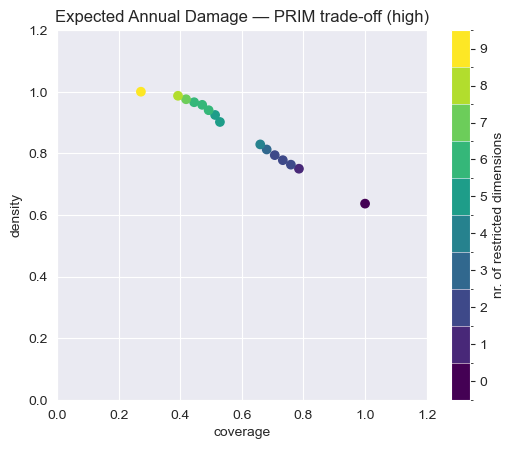


Running PRIM for low values of 'Expected Annual Damage'
Best box for low values:
coverage     0.440367
density      1.000000
id          14.000000
k           48.000000
mass         0.160000
mean         1.000000
n           48.000000
res_dim      4.000000
Name: 14, dtype: float64

             box 14                                 
                min       max      qp value qp value
1_RfR 0    1.000000  1.000000  3.129857e-11      NaN
A.1_pfail  0.290055  0.997963  1.521296e-05      NaN
A.5_pfail  0.222373  0.994135  2.877852e-03      NaN
A.2_pfail  0.193778  0.993437  9.429993e-03      NaN



/Users/tessahuysinga/Downloads/anaconda3/lib/python3.12/site-packages/ema_workbench/analysis/prim.py:1569: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  box_paste.loc[i, u] = paste_value


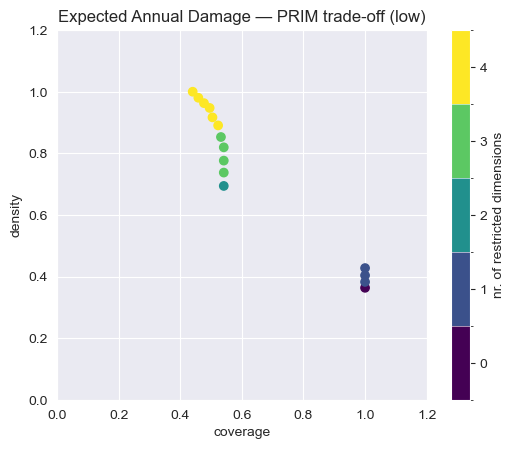


--- PRIM for outcome: Dike Investment Costs ---

Running PRIM for high values of 'Dike Investment Costs'
⚠️ PRIM failed for Dike Investment Costs (high): 

Running PRIM for low values of 'Dike Investment Costs'
⚠️ PRIM failed for Dike Investment Costs (low): 

--- PRIM for outcome: Expected Number of Deaths ---

Running PRIM for high values of 'Expected Number of Deaths'
⚠️ PRIM failed for Expected Number of Deaths (high): 

Running PRIM for low values of 'Expected Number of Deaths'
⚠️ PRIM failed for Expected Number of Deaths (low): 

--- PRIM for outcome: RfR Total Costs ---

Running PRIM for high values of 'RfR Total Costs'
Best box for high values:
coverage      1.000000
density       1.000000
id            1.000000
k           200.000000
mass          0.666667
mean          1.000000
n           200.000000
res_dim       1.000000
Name: 1, dtype: float64

        box 1                            
          min  max qp value      qp value
0_RfR 0   0.0  0.0      NaN  6.049900e-36



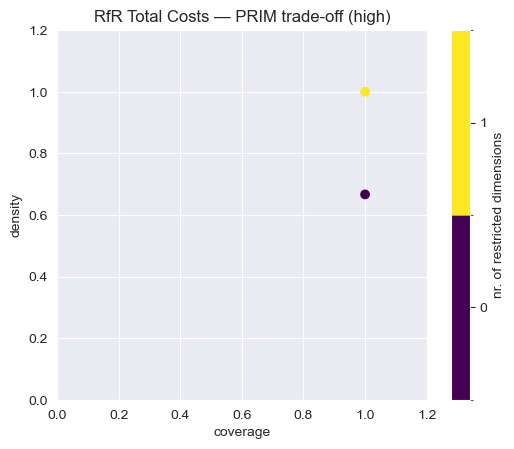


Running PRIM for low values of 'RfR Total Costs'
Best box for low values:
coverage      1.000000
density       1.000000
id            1.000000
k           100.000000
mass          0.333333
mean          1.000000
n           100.000000
res_dim       1.000000
Name: 1, dtype: float64

        box 1                            
          min  max      qp value qp value
0_RfR 0   1.0  1.0  1.940325e-48      NaN



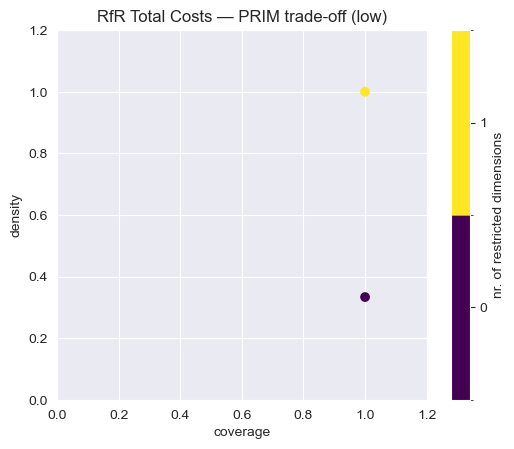


--- PRIM for outcome: Expected Evacuation Costs ---

Running PRIM for high values of 'Expected Evacuation Costs'
⚠️ PRIM failed for Expected Evacuation Costs (high): 

Running PRIM for low values of 'Expected Evacuation Costs'
⚠️ PRIM failed for Expected Evacuation Costs (low): 


In [41]:
#Nu deze functie runnen
outcome_list = list(outcomes.keys())
prim_boxes = run_prim_for_outcomes(experiments, outcomes, outcome_list)

Volgens mij moeten we hier opzoek gaan naar de worst en best case scenarios, en dan kijken welke (combinatie van) variabelen zorgen voor deze slechte of goede scenarios, en hiermee verder werken in die MORDM analyse. Wat hierboven staat klopt nog niet helemaal maar geeft wel een beeld hoe we de PRIM en scenario analyse kunnen gebruiken.